# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [4]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_SubwaySurfers_1.csv")
df.head()

,userName,score,at,content
0,Muhammad Syafruddin,5,2024-05-30 03:11:26,Versi jalanan/kota Indonesia????kapan????
1,Niinut Niinut,5,2024-05-30 02:16:00,"Suka banget sama permainannya, thank you 😊"
2,Yuanita Nahda,5,2024-05-30 00:40:21,Tempat dan karakter ny unik gak mudah bosen pa...
3,Roif,5,2024-05-30 00:06:33,"Nice game,This is a masterpiece"
4,Marlina Ktb,4,2024-05-29 22:08:13,Lumayan bagus keren sih👍


In [5]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Versi jalanan/kota Indonesia????kapan????,Muhammad Syafruddin,2024-05-30 03:11:26
1,"Suka banget sama permainannya, thank you 😊",Niinut Niinut,2024-05-30 02:16:00
2,Tempat dan karakter ny unik gak mudah bosen pa...,Yuanita Nahda,2024-05-30 00:40:21
3,"Nice game,This is a masterpiece",Roif,2024-05-30 00:06:33
4,Lumayan bagus keren sih👍,Marlina Ktb,2024-05-29 22:08:13
...,...,...,...
393,Game nya bagus pas aku sunat mainin game ini g...,Azra No 18,2024-05-23 23:20:53
394,Jelek tidak bagus,Agung Putra,2024-05-23 23:19:02
395,Wau bagus sekali😎😊😀,Naffara 815,2024-05-23 23:16:27
396,Game nya seru,Nugie Realme,2024-05-23 23:15:02


In [6]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   398 non-null    object
 1   userName  398 non-null    object
 2   at        398 non-null    object
dtypes: object(3)
memory usage: 9.5+ KB


In [7]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,398,398,398
unique,368,398,398
top,Bagus,Muhammad Syafruddin,2024-05-30 03:11:26
freq,14,1,1


# **Cleaning Data**

In [8]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(398, 3)

In [9]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [10]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [11]:
# Menghapus data yang kosong
df = df.dropna()

In [12]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [13]:
df.shape

(368, 3)

In [14]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [15]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [16]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,versi jalanankota indonesiakapan,Muhammad Syafruddin,2024-05-30 03:11:26
1,suka banget sama permainannya thank you,Niinut Niinut,2024-05-30 02:16:00
2,tempat dan karakter ny unik gak mudah bosen pa...,Yuanita Nahda,2024-05-30 00:40:21
3,nice gamethis is a masterpiece,Roif,2024-05-30 00:06:33
4,lumayan bagus keren sih,Marlina Ktb,2024-05-29 22:08:13
...,...,...,...
393,game nya bagus pas aku sunat mainin game ini g...,Azra No 18,2024-05-23 23:20:53
394,jelek tidak bagus,Agung Putra,2024-05-23 23:19:02
395,wau bagus sekali,Naffara 815,2024-05-23 23:16:27
396,game nya seru,Nugie Realme,2024-05-23 23:15:02


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [17]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,versi jalanankota indonesiakapan,Muhammad Syafruddin,2024-05-30 03:11:26
1,suka banget sama permainannya thank you,Niinut Niinut,2024-05-30 02:16:00
2,tempat dan karakter ny unik tidak mudah bosen ...,Yuanita Nahda,2024-05-30 00:40:21
3,nice gamethis is a masterpiece,Roif,2024-05-30 00:06:33
4,lumayan bagus keren sih,Marlina Ktb,2024-05-29 22:08:13
...,...,...,...
393,game nya bagus pas aku sunat mainin game ini g...,Azra No 18,2024-05-23 23:20:53
394,jelek tidak bagus,Agung Putra,2024-05-23 23:19:02
395,wau bagus sekali,Naffara 815,2024-05-23 23:16:27
396,game nya seru,Nugie Realme,2024-05-23 23:15:02


In [18]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [19]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,versi jalanankota indonesiakapan,Muhammad Syafruddin,2024-05-30 03:11:26
1,suka banget sama permainannya thank you,Niinut Niinut,2024-05-30 02:16:00
2,tempat karakter ny unik mudah bosen pas main,Yuanita Nahda,2024-05-30 00:40:21
3,nice gamethis is a masterpiece,Roif,2024-05-30 00:06:33
4,lumayan bagus keren sih,Marlina Ktb,2024-05-29 22:08:13
...,...,...,...
393,game nya bagus pas aku sunat mainin game ga ra...,Azra No 18,2024-05-23 23:20:53
394,jelek bagus,Agung Putra,2024-05-23 23:19:02
395,wau bagus sekali,Naffara 815,2024-05-23 23:16:27
396,game nya seru,Nugie Realme,2024-05-23 23:15:02


In [20]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                   [versi, jalanankota, indonesiakapan]
1         [suka, banget, sama, permainannya, thank, you]
2      [tempat, karakter, ny, unik, mudah, bosen, pas...
3                   [nice, gamethis, is, a, masterpiece]
4                           [lumayan, bagus, keren, sih]
                             ...                        
393    [game, nya, bagus, pas, aku, sunat, mainin, ga...
394                                       [jelek, bagus]
395                                 [wau, bagus, sekali]
396                                    [game, nya, seru]
397    [seru, pun, bikin, kesel, tidak, bikin, bosan,...
Name: content, Length: 368, dtype: object

In [21]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_SubwaySurfers_1.csv', index = False)


In [22]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_SubwaySurfers_1.csv', encoding = 'latin1')
df_clean

,content
0,versi jalanankota indonesiakapan
1,suka banget sama main thank you
2,tempat karakter ny unik mudah bosen pas main
3,nice gamethis is a masterpiece
4,lumayan bagus keren sih
...,...
363,game nya bagus pas aku sunat mainin game ga ra...
364,jelek bagus
365,wau bagus sekali
366,game nya seru


# **Translate**

In [23]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [24]:
# import pandas as pd
# from easynmt import EasyNMT

In [25]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_SubwaySurfers_1.csv', encoding='latin1')

In [26]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [27]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [28]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [29]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SubwaySurfers_1.csv')

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SubwaySurfers_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,versi jalanankota indonesiakapan,The version of the city street in Indonesia
1,1,suka banget sama main thank you,Loves to play thank you
2,2,tempat karakter ny unik mudah bosen pas main,"fontcolor="" # FFFF00""placesthecharacterunique ..."
3,3,nice gamethis is a masterpiece,nice game this is a masterpiece
4,4,lumayan bagus keren sih,"Pretty good. Cool, though."
...,...,...,...
363,363,game nya bagus pas aku sunat mainin game ga ra...,It was a good game when I got circumcised. Pla...
364,364,jelek bagus,It's ugly. Good.
365,365,wau bagus sekali,That's great.
366,366,game nya seru,It's a fun game.


# **Labeling**

In [31]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SubwaySurfers_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,versi jalanankota indonesiakapan,The version of the city street in Indonesia
1,1,suka banget sama main thank you,Loves to play thank you
2,2,tempat karakter ny unik mudah bosen pas main,"fontcolor="" # FFFF00""placesthecharacterunique ..."
3,3,nice gamethis is a masterpiece,nice game this is a masterpiece
4,4,lumayan bagus keren sih,"Pretty good. Cool, though."
...,...,...,...
363,363,game nya bagus pas aku sunat mainin game ga ra...,It was a good game when I got circumcised. Pla...
364,364,jelek bagus,It's ugly. Good.
365,365,wau bagus sekali,That's great.
366,366,game nya seru,It's a fun game.


In [32]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [33]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 218
Netral = 85
Negatif = 65

Total Data Seluruhnya : 368


In [35]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,versi jalanankota indonesiakapan,The version of the city street in Indonesia,Netral
1,1,suka banget sama main thank you,Loves to play thank you,Netral
2,2,tempat karakter ny unik mudah bosen pas main,"fontcolor="" # FFFF00""placesthecharacterunique ...",Netral
3,3,nice gamethis is a masterpiece,nice game this is a masterpiece,Positif
4,4,lumayan bagus keren sih,"Pretty good. Cool, though.",Positif
...,...,...,...,...
363,363,game nya bagus pas aku sunat mainin game ga ra...,It was a good game when I got circumcised. Pla...,Positif
364,364,jelek bagus,It's ugly. Good.,Netral
365,365,wau bagus sekali,That's great.,Positif
366,366,game nya seru,It's a fun game.,Negatif


In [36]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,versi jalanankota indonesiakapan,The version of the city street in Indonesia,Netral
1,suka banget sama main thank you,Loves to play thank you,Netral
2,tempat karakter ny unik mudah bosen pas main,"fontcolor="" # FFFF00""placesthecharacterunique ...",Netral
3,nice gamethis is a masterpiece,nice game this is a masterpiece,Positif
4,lumayan bagus keren sih,"Pretty good. Cool, though.",Positif
...,...,...,...
363,game nya bagus pas aku sunat mainin game ga ra...,It was a good game when I got circumcised. Pla...,Positif
364,jelek bagus,It's ugly. Good.,Netral
365,wau bagus sekali,That's great.,Positif
366,game nya seru,It's a fun game.,Negatif


# **Visualisasi**


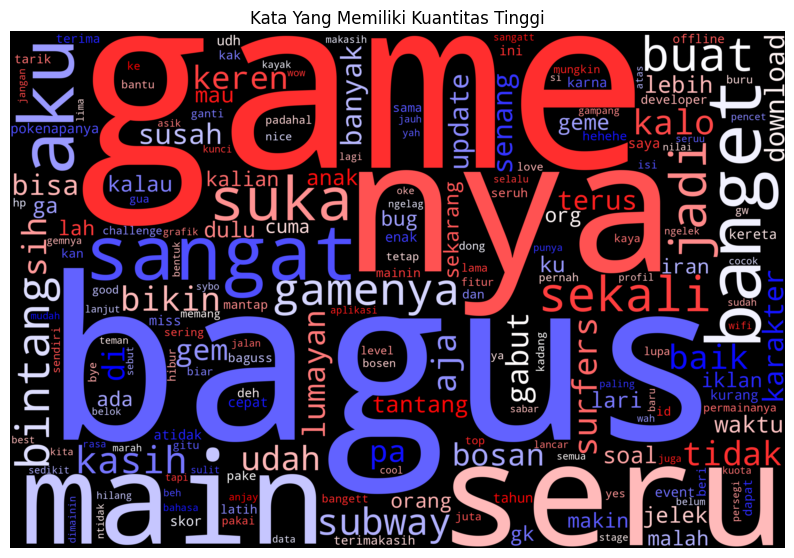

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


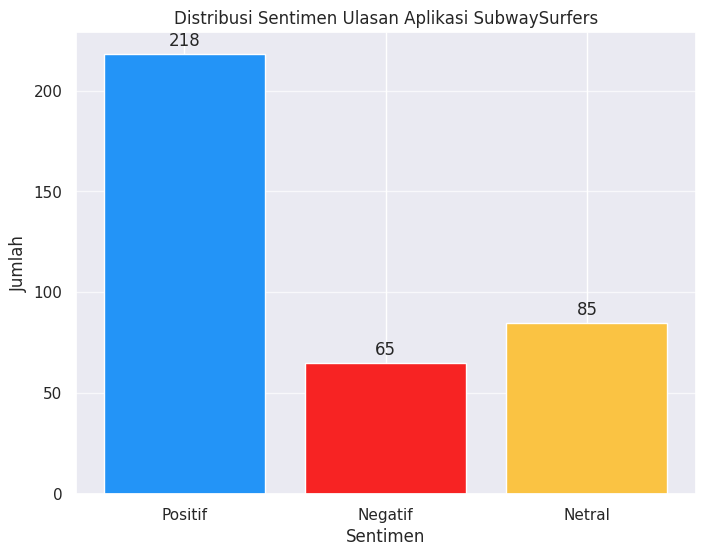

In [38]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SubwaySurfers")


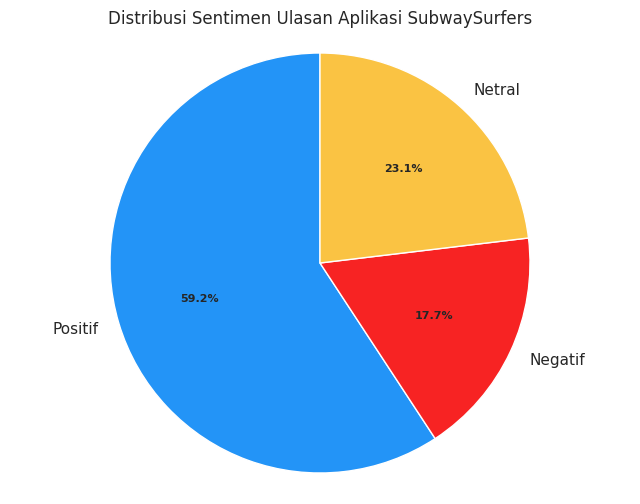

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SubwaySurfers")

In [40]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
3,nice gamethis is a masterpiece,nice game this is a masterpiece,Positif
4,lumayan bagus keren sih,"Pretty good. Cool, though.",Positif
5,bagus misal tidak kait,Good. I don't think it's a hook.,Positif
6,good,good,Positif
7,main seru banget,It's been fun.,Positif
...,...,...,...
362,enak main,It's good. It's good. It's good.,Positif
363,game nya bagus pas aku sunat mainin game ga ra...,It was a good game when I got circumcised. Pla...,Positif
365,wau bagus sekali,That's great.,Positif
366,game nya seru,It's a fun game.,Negatif


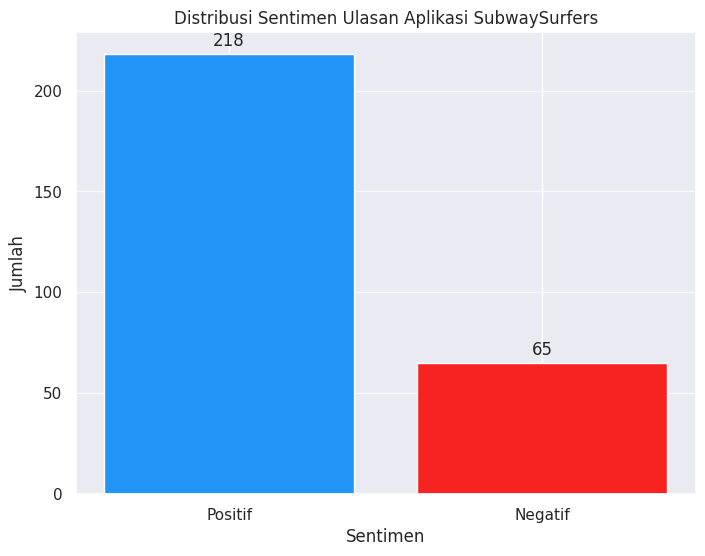

In [41]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SubwaySurfers")


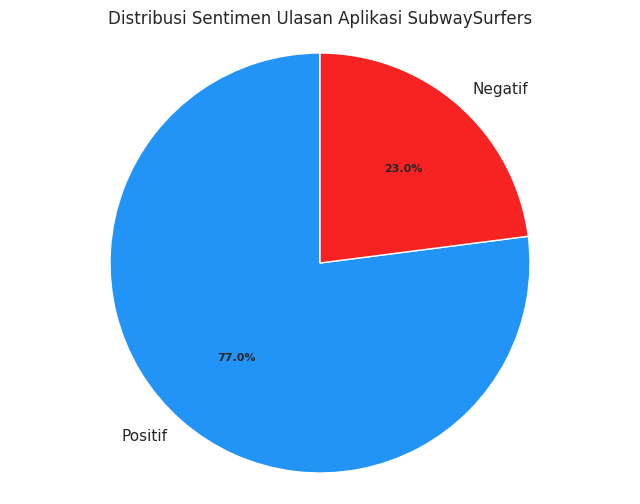

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SubwaySurfers")

In [43]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
3,nice gamethis is a masterpiece,nice game this is a masterpiece,1
4,lumayan bagus keren sih,"Pretty good. Cool, though.",1
5,bagus misal tidak kait,Good. I don't think it's a hook.,1
6,good,good,1
7,main seru banget,It's been fun.,1
...,...,...,...
362,enak main,It's good. It's good. It's good.,1
363,game nya bagus pas aku sunat mainin game ga ra...,It was a good game when I got circumcised. Pla...,1
365,wau bagus sekali,That's great.,1
366,game nya seru,It's a fun game.,0


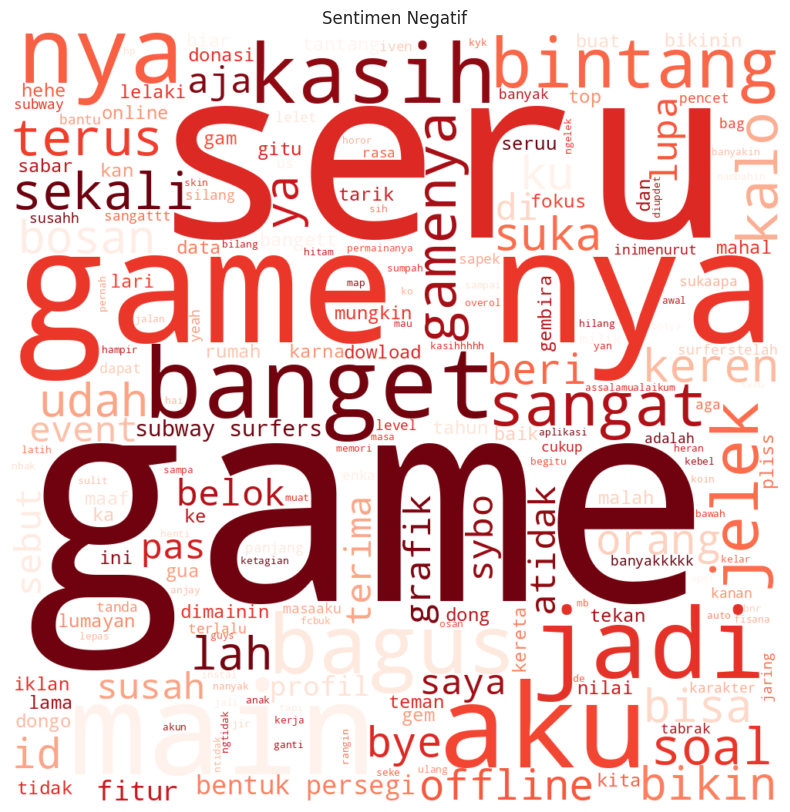

In [44]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

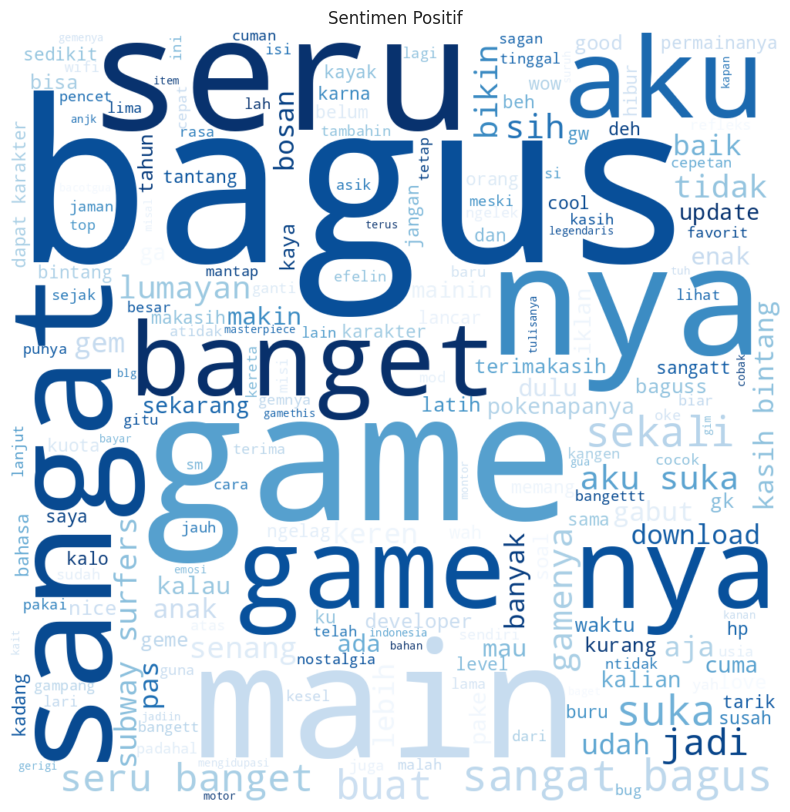

In [45]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [46]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    218
0     65
Name: count, dtype: int64

# **Data Preparation & Modeling**

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [48]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
X_train

254                            asik game nya bikin bosen
31                                  jaring terlalu lelet
108    bagus benget game nya aku senang main nya belu...
175                                     seru bikin gabut
226                                                bagus
                             ...                        
237    aku suka game kayak apaya latih sabar dan bagu...
92                                          gamenya seru
136                                     main latih fokus
350                                                hebat
129                   seru soa nya lari nya cepat banget
Name: content, Length: 226, dtype: object

In [50]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [51]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [52]:
X_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.8070175438596491
Akurasi untuk c = 0.05: 0.8070175438596491
Akurasi untuk c = 0.25: 0.8596491228070176
Akurasi untuk c = 0.5: 0.8421052631578947
Akurasi untuk c = 0.75: 0.8421052631578947
Akurasi untuk c = 1: 0.8070175438596491


In [54]:
linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [55]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8070175438596491 


In [56]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.81
[[ 5  6]
 [ 5 41]]
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        11
           1       0.87      0.89      0.88        46

    accuracy                           0.81        57
   macro avg       0.69      0.67      0.68        57
weighted avg       0.80      0.81      0.80        57



In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 5  6]
 [ 5 41]]

True Positives (TP) =  5

True Negatives (TN) =  41

False Positives (FP) =  6

False Negatives (FN) =  5

Accuracy =  0.8070175438596491


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

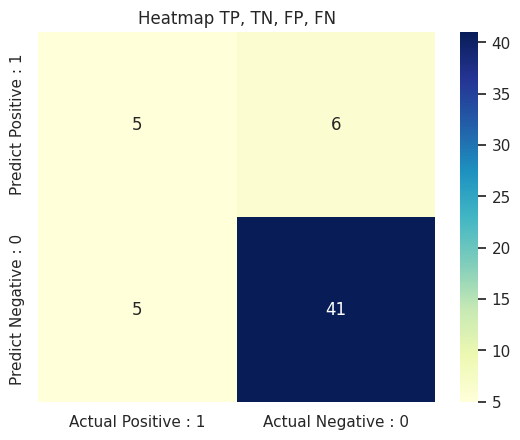

In [58]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [59]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [60]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8070


In [61]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1930


# **Testing**


In [62]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : bagus banget jadi nostalgia
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 93.12%
Probabilitas: 93.11855403542368 %


In [63]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : jelek sekarang jadi banyal iklannya
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 60.32%
Probabilitas: 60.318715678175806 %
